# Machine learning- REGRESSION

# Stage B Hamoye Intenship Lesson Notes

Hi, its Adedayo again, I think the note structure this time around is a great outline line for studying because I had to go through some topics that I would have normally ignored or chosen a black box approach to them without bothering to learn the inner workings, so an outline really removes all excuses.
This is a jupyter notebook containing a reformat of the lessons and code from lesson 1 to 5 and in a manner I hope you think is clear and consise, it is mostly the same as the lesson notes with a few added personal insights, I am not an expert by means so I encourage you correct me if i am wrong in some areas and give new insights so I can improve this notebook
I will also be including links to useful resources for further reading

### Goals I gave my self
* I told my self I would not attach any image to the notebooks to ensure I find a code that gives the approximate result as the note drawing, so please cross reference with your notes
* In the same vein as the above resolve i tried to use the oppurtunity to pratcice my Markdown and LaTex,instead of copy- pasting equation images 
* This will only serve as a study guide i will go back and further revise articles and videos on the individuals
* if neither of the first two options are available i will link an article with the exact image used in the notes.

#### How to use this notebook if  you download to your system
* if you just want to read it do not click on run
* for the section dealing with the fuel data input the file location for the data on your device if you want to run
* make sure the kernel is active and you have ran the whole program once if you want to make random ages at different points



# Importing and loading packages that govern the entire notebook
#### for the scikit learn packages  I imported them where they are required 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt #plotting
import matplotlib.gridspec as gridspec#plotting
import seaborn as sns #plotting
sns.despine() # to give the graphs a particular design
plt.rc('figure', figsize=(20,10)) #to make all my graphs the same size

<Figure size 432x288 with 0 Axes>

# Lesson 1- Simple	Linear	Regression
According to the United Nations Environmental Program (UNEP) Sustainable Buildings and Climate Initiative, construction trade contributes as much as
30% to all global greenhouse gas emissions and consumes up to 40% of all energy used worldwide. Climate change is currently having a powerful impact on
how buildings are designed and constructed.
Predicting numeric outcomes with some accuracy measure is an important facet of machine learning and data science. For this part, we will use a case
study to understand linear regression and its associated cousins. We will learn about the assumptions behind linear regression, multiple linear regression,
partial least squares and penalizations. We’ll also focus on strategies for measuring regression performance and implementations.
In this module, we will develop a multivariate multiple regression model to study the effect of eight input variables on two output variables, which are the
heating load and the cooling load, of residential buildings. The data provided is from the energy analysis data of 768 different building shapes. The features
provided are the relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution.
Data Source for content: UCI Machine Learning Repository: Energy efficiency Data Set
Data Quiz: UCI Machine Learning Repository: Appliances energy prediction Data Set

## Simple	Linear	Regression
The simple linear regression model.
A simple linear regression model estimates the relationship between two quantitative variables where one is referred to as the **independent variable** and the
other the **dependent variable**. The independent variable (X) is used to predict and also called the predictor while the **predicted variable** is referred to as the
**response variable** (Y) (e.g. finding the relationship between the amount of CO gas emitted and the number of trees cut down). The value of Y can be
obtained from X by finding the line of best fit (regression line) with minimum error for the data points on a scatter plot for both variables. A simple linear
regression can be represented as:
where
The UCI Machine Learning Repository: Energy efficiency Data Set is used in this module for better understanding of the concepts. We select a sample of the
dataset and use the relative compactness column as the predictor and the heating load column the response variable.(the code given in the snippest uses cooling load causing a slight variation from thegraph after given it much thought i decided to go with heating load because thatis what is used in later chapters)

Where
>y = $\theta_0x$ + $\theta_1$

> $x$ is the independent variable,

>$\theta_1$ is the intercept

>$\theta_0$ is the slope of the line of best fit

>θ$\theta_0$ and $\theta_1$are known as regression coefficients 

## Loading Data and EDA

In [2]:
#df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/0024
#2/ENB2012_data.xlsx')
                 # I commented it out because i alread have the dataset saved locally in my case
df = pd.read_excel('.....input/ENB2012_data.xlsx')#put your own file path here
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [3]:
#rename columns to match description given us
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df = df.rename(columns=column_names)
df.describe(include='all')
#the Ys are the target variables

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
#select a sample of the dataset to have rough look at the relationships
simple_linear_reg_df = df[['Relative_Compactness','Heating_Load']].sample(15, random_state=2)

In [5]:
spr =(df.corr()["Heating_Load"].sort_values(ascending = False)[1:10])
print(spr)
#i just wanted to look at how much of a corellartion the relative compactness has to the target variable

Cooling_Load                 0.975862
Overall_Height               0.889430
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269842
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
Name: Heating_Load, dtype: float64


## Generating a Dummy Regression dataset
with scikitlearn you can a dataset by specifiying the ruless you want it follow like th count, the number of predictor variables  make_regression(), creates a regression model you can also specify the amount of **noise** your model will have so it wont be tooo perfect, i chose a noise level of 10 and 8 predictor(X) variables it auto generates the y variable, so i will treat it in same manner as the original dataset, by renaming them, you can also modify the scaling but i did not bother


In [6]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
Xb,yb = make_regression(n_samples=768, n_features=8, noise=10,random_state=1)

In [7]:
df5=pd.DataFrame(Xb,yb)
df5.reset_index()
df5.head()

,0,1,2,3,4,5,6,7
-159.545645,-0.744387,-0.394079,-0.707782,-0.319029,0.267762,-0.478694,-0.380659,0.307383
-20.953029,0.346482,-0.582494,-0.303334,1.156329,-0.853881,0.032758,-0.072620,0.064841
-53.315416,0.001055,-0.859827,-2.026206,1.458773,0.539138,-1.089535,1.648551,-0.437908
265.172028,-0.074497,-0.572602,2.384405,-0.026964,1.861565,-1.618318,2.134552,-1.649750
-353.390003,-0.212508,-1.068460,-0.683713,0.316530,-0.407013,-1.168142,-0.058339,-2.844938


In [8]:
column_names = {0:'Relative_Compactness', 1: 'Surface_Area',
2: 'Wall_Area', 3: 'Roof_Area', 4: 'Overall_Height',
5: 'Orientation', 6: 'Glazing_Area',
7: 'Glazing_Area_Distribution'}
df5 = df5.rename(columns=column_names)
df5.head() #changing the column names to match the original dataset but the y is autogenerted lets treat it as cooling load

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
-159.545645,-0.744387,-0.394079,-0.707782,-0.319029,0.267762,-0.478694,-0.380659,0.307383
-20.953029,0.346482,-0.582494,-0.303334,1.156329,-0.853881,0.032758,-0.072620,0.064841
-53.315416,0.001055,-0.859827,-2.026206,1.458773,0.539138,-1.089535,1.648551,-0.437908
265.172028,-0.074497,-0.572602,2.384405,-0.026964,1.861565,-1.618318,2.134552,-1.649750
-353.390003,-0.212508,-1.068460,-0.683713,0.316530,-0.407013,-1.168142,-0.058339,-2.844938


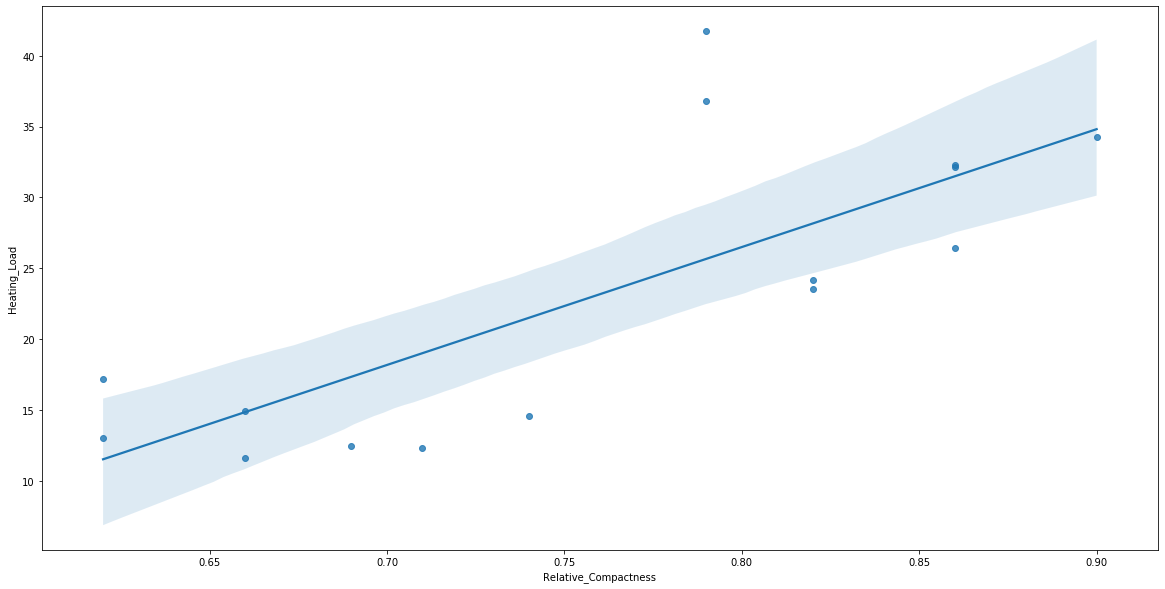

In [9]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Heating_Load",
data=simple_linear_reg_df)#using reg plot one can see that there is a linear relationship

In [10]:
#i wanted to plot the true vs predicted graph so i ran the linear regression model on scikit learn
from sklearn.model_selection import train_test_split # to split the data
from sklearn.linear_model import LinearRegression #the model used, it is used for single and multivaraiate

X =  df[['Relative_Compactness']] #chosen predictor
y=  df[['Heating_Load']] #target variable, you can set multiple predictors or target varaiables

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

lR = LinearRegression().fit(X_train, y_train)

lR_pred= lR.predict(X_test) # the predicted vriable

## Collinearity and Assumptions for Linear Regression
For better understanding, we explain the assumptions made by linear regression by comparing results on our energy efficiency dataset and a dummy linear dataset generated to have similar shape (same number of rows and column) as the energy efficiency dataset. Some assumptions made by linear regression
models about the data are:
1. **Linearity**: the relationship between the variables is linear such that a straight line is the line of best fit from the   regression plots above, we can see that the residuals of the dummy data are spread across the regression line as they should be to meet thelinearity assumption unlike the residuals of the energy efficiency dataset which are a bit farther from the regression line.

Text(0, 0.5, 'Predicted Values')

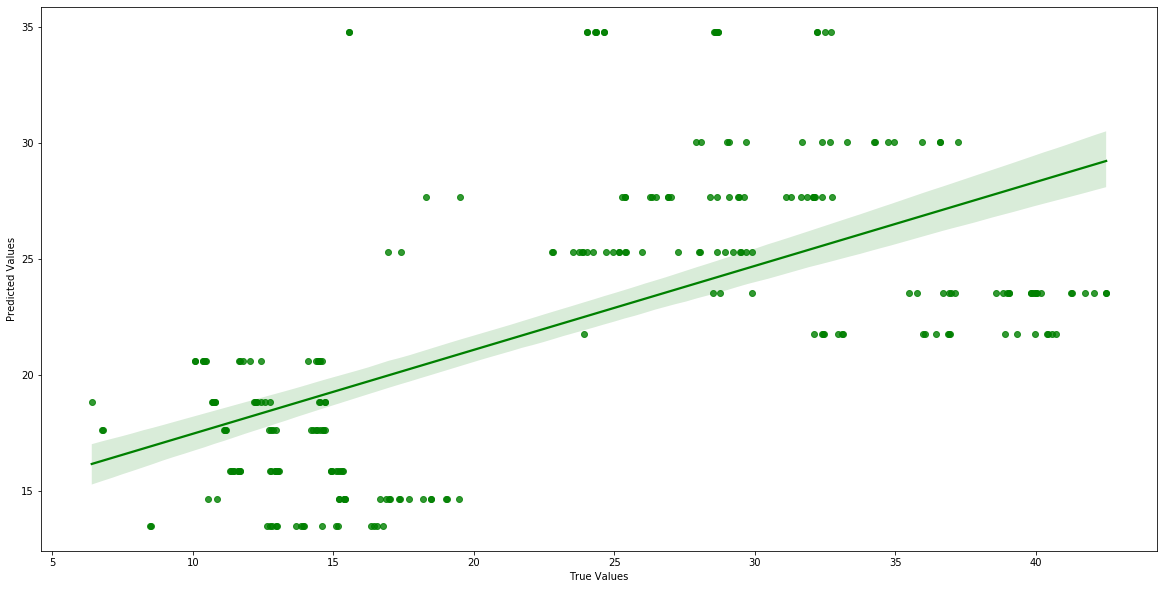

In [11]:
# Plot outputs
sns.regplot(x= y_test,y=lR_pred,color='green')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
#this graph shows the errors in our simple linear relationships

In [12]:
Xc =  df5[['Relative_Compactness']]
X_train1,X_test1,y_train1,y_test1 = train_test_split(Xc,yb,test_size=0.33,random_state=1)

lRD = LinearRegression().fit(X_train1, y_train1)

lRD_pred= lRD.predict(X_test1)

Text(0, 0.5, 'Dummy Predicted Values')

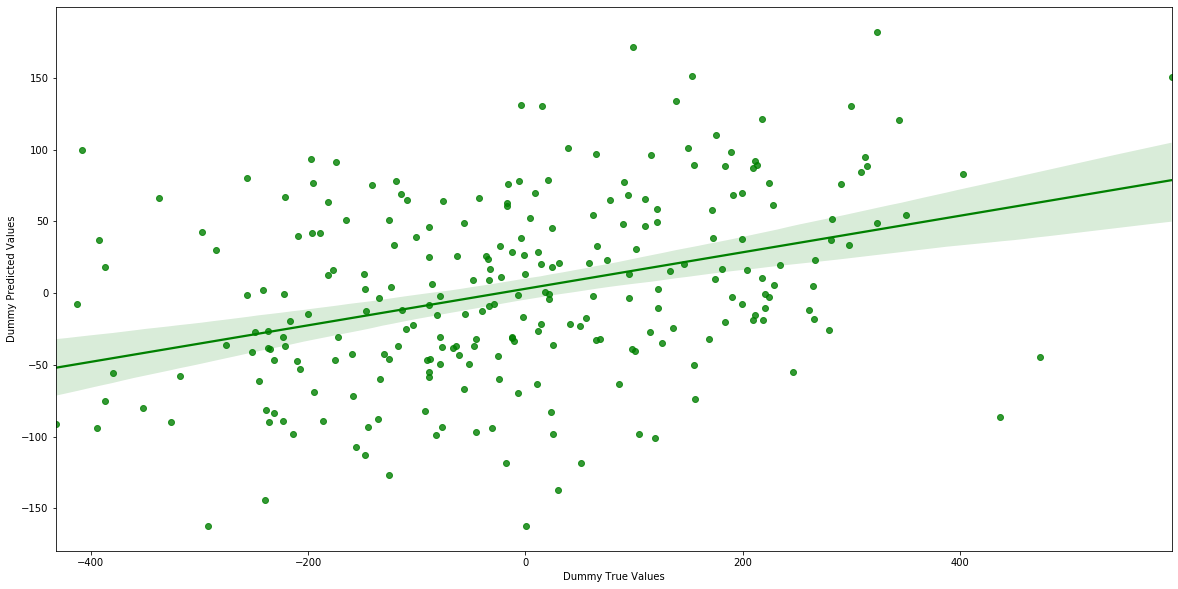

In [13]:
# Plot outputs
sns.regplot(x= y_test1,y=lRD_pred,color='green')
plt.xlabel("Dummy True Values")
plt.ylabel("Dummy Predicted Values")
#inconstast to the real world data the dummy data is showing a relitively accurate linear relationship if you reduce 
#the noise level the data points will align perfectly


2. **Homoscedasticity**: the residuals or prediction errors are of equal or constant variance.this is shown  inthe residual plot

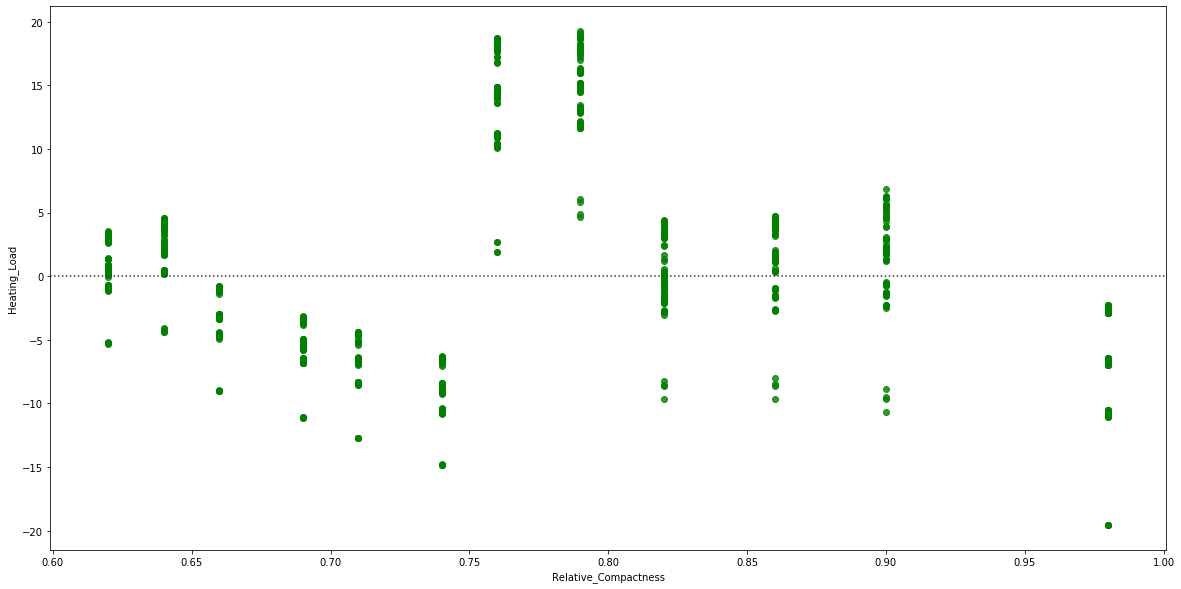

In [14]:
sns.residplot(x=X, y=y,color="green",
data=df)

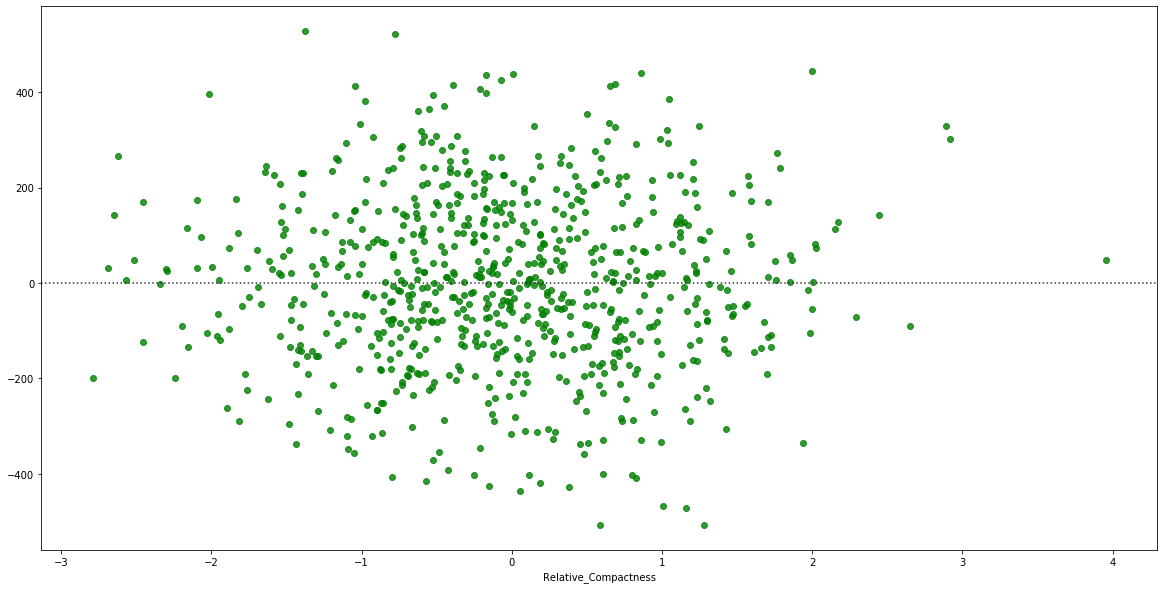

In [15]:
sns.residplot(x=Xc, y=yb,color="green",
data=df)

3. **Normality**: the residuals are of a normal distributionThe energy efficiency dataset flouts this assumption as the residuals are clearly not normally distributed while the dummy dataset has normally distributed residuals with the mean and median at 0.

In [16]:
d= np.floor(y_test)
stuff=pd.DataFrame(d)
e= np.floor(lR_pred)
stuff2=pd.DataFrame(e)
stuff.reset_index(drop=True,inplace=True)
f=stuff["Heating_Load"]-stuff2[0]
#i was having issues subtracting the results to create a residuals array so made them into numpy object then dtaframe before
#plotting their distribution
# does anybody have have a more effecient method please DM me

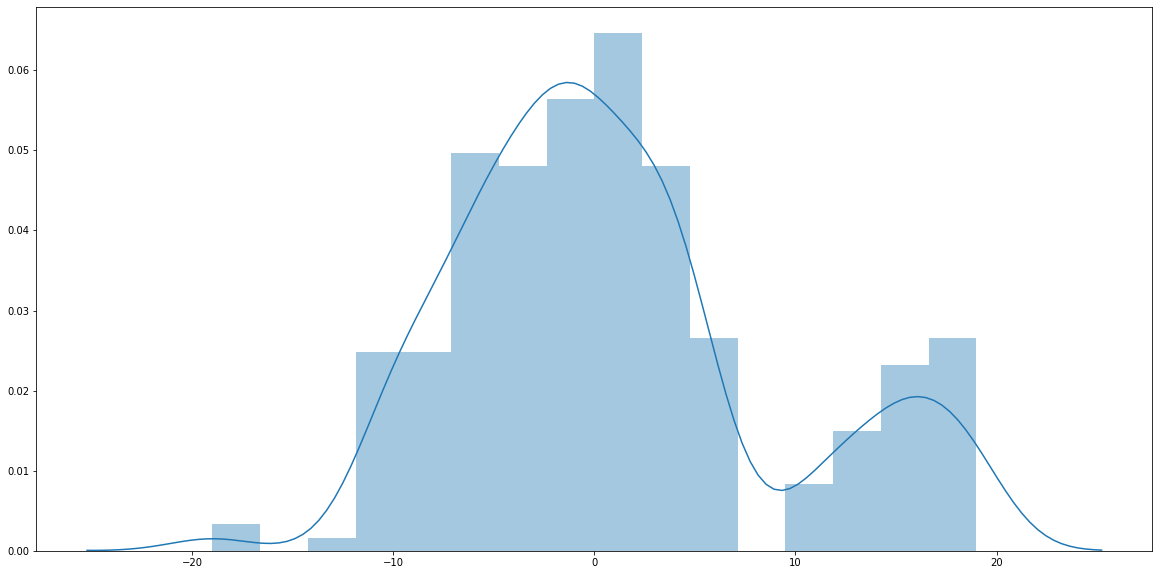

In [17]:
sns.distplot(f)

In [18]:
h= np.floor(y_test1)
buff=pd.DataFrame(h)
i= np.floor(lRD_pred)
buff2=pd.DataFrame(i)
buff.reset_index(drop=True,inplace=True)
j=buff[0]-buff2[0]

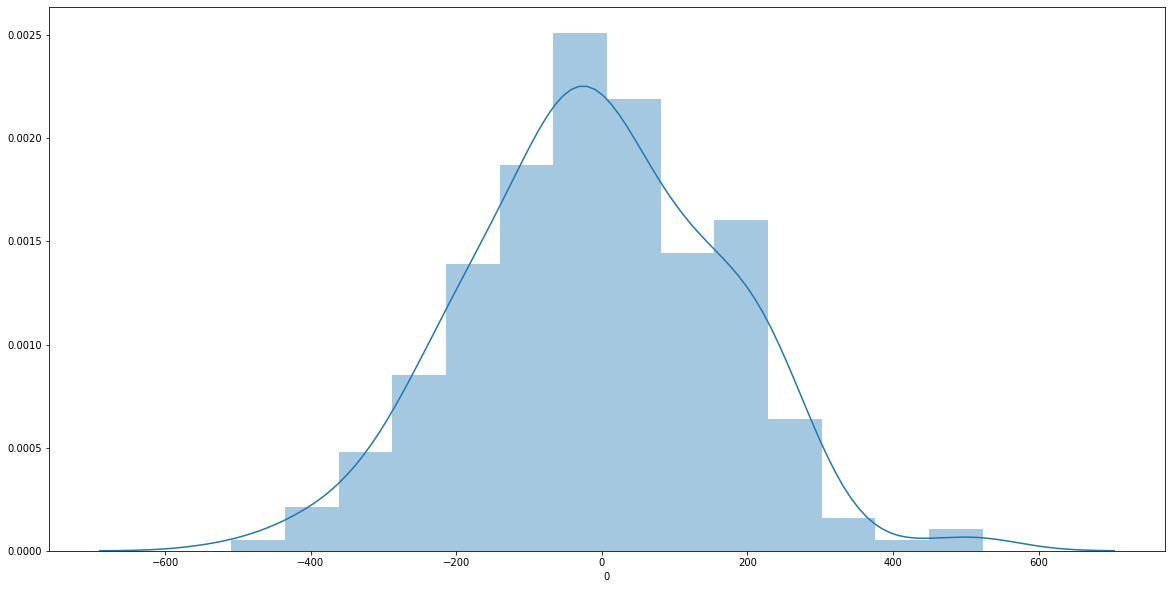

In [19]:
sns.distplot(j)
#sns.distplot(j,kde_kws={'bw':1.5},hist=False)

4. Independence of the observations
In multiple linear regression where there are more predictors, it is assumed that these variables are independent of each other without any strong correlation between them. The energy efficiency dataset shows a strong correlation between relative compactness and surface area, relative compactness and overall height, surface area and roof area while the variables in the dummy dataset are seen to be independent of each other.
Overall, before inferences are drawn from a linear regression model, all the assumptions discussed above must have been met.


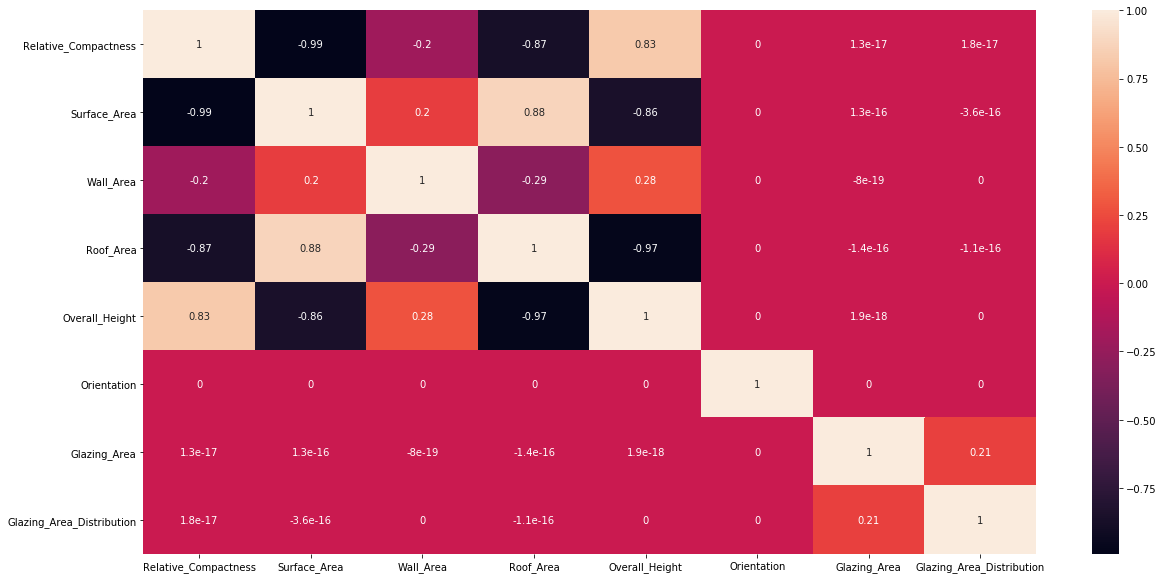

In [20]:
dfa=df.drop(["Cooling_Load","Heating_Load"],axis=1) #removing the target variable so observe
#the relationship between predictors
sns.heatmap(dfa.corr(),annot=True)

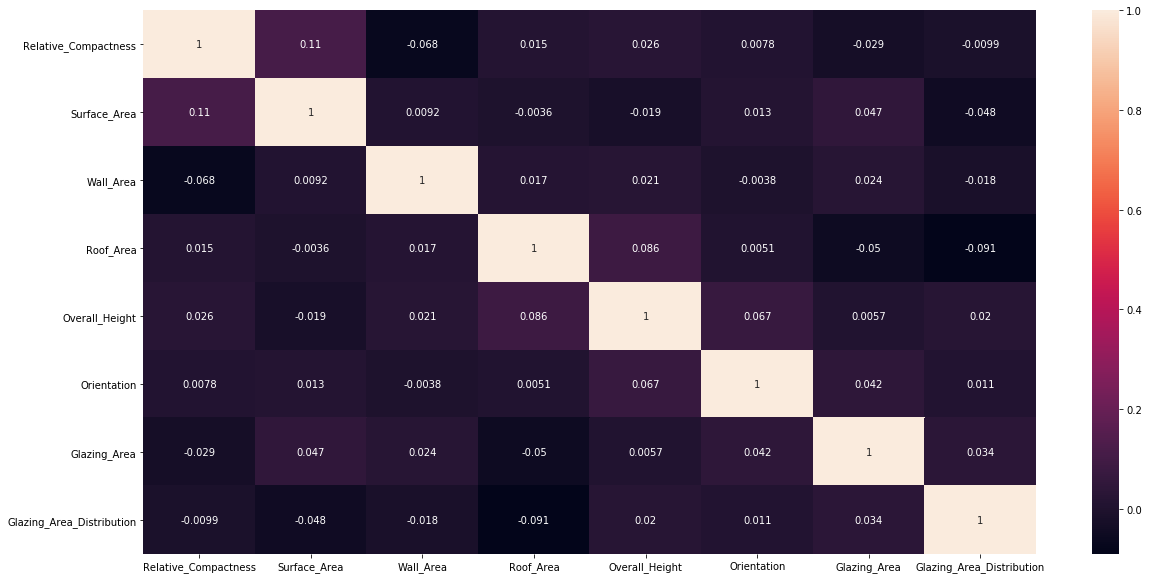

In [21]:
sns.heatmap(df5.corr(),annot=True)

## Reading Recommendations

Linear Regression in Python – Real Python(most similar tothe notes, has been referenced several timesin the prerequisite)
https://realpython.com/linear-regression-in-python/


A beginner’s guide to Linear Regression in Python with Scikit-Learn | by Nagesh Singh Chauhan | Towards Data Science
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

other than using sklearn i recommend reading up on building the algorithm from scratch withouth any packages or libraries it will help understand the concepts like gradient descent and other concepts

How To Implement Simple Linear Regression From Scratch With Python
https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/


Linear Regression Algorithm from scratch in Python | Edureka
https://www.edureka.co/blog/linear-regression-in-python/

Linear Regression Example — scikit-learn 0.23.1 documentation
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html


How to Generate Test Datasets in Python with scikit-learn
https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

# Lesson 2- Multiple Linear	Regression
Unlike simple linear regression, multiple linear regression establishes the relationship between the response variable and the predictors (usually two or
more). In reality, several factors contribute to a certain outcome as opposed to just one as suggested by simple linear regression. Multiple linear regression
has similar assumptions as simple linear regression and also assumes that there is no significant correlation between the predictors. While the relationship
between variables can be linear, it allows for non-linear relationships that are not straight lines.
>Y= 𝜃 + 𝜃 X + 𝜃 X + . . . + 𝜃 X + ɛ

## Section A- Collinearity
Correlation is a measure used to describe the linear relationship between two variables. Correlation values range from -1 for a perfect negative correlation
(an increase in one variable causes a decrease in the other variable) to +1 for a perfect positive correlation (both variables increase or decrease together). A
correlation value of 0 indicates that there is absolutely no correlation between both variables. A situation where two or more of the predictors have a
strong correlation is known as multicollinearity. Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables
cannot independently contribute to predicting the value of the response variable. In addition, not all the predictors included are relevant in obtaining better
results from the model. Adding more independent variables to the model is not always better instead, it might only make the model more complicated. To
resolve this, one of the correlated predictors is selected and the other removed from the data.

* This basically explains the correlation heatmap in the previous lesson the more linear the relationship between the target variables and the predictors the less correlation the features should have with each other

## Polynomial Regression
A polynomial regression model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and
the response variable. It can be represented as Y= 𝜃 + 𝜃 X + 𝜃 X + . . . + 𝜃 X + ɛ, for a single independent variable where n is the degree of the polynomial
and Y is a linear function of 𝜃. Depending on the task and data, there might be multiple predictors in a polynomial regression model which results in more
interactions in the model. As expected, the complexity in the model increases as the degree increases.
- Coefficients of multiple linear regression
- General notations
 
### AKA Interaction Effect (Synergy)
this involves creating new feature that would that are a result of the multiplication or dvision of new feature that may have a stronger effect on the tardet variable, we will know the effect when measuring the Regression Performance, this should be done carefully with every step of the way to ensure that you dont add a new feature that can damage your model, I will test this out in the next lesson.

# Lesson 3- Measuring	Regression	Performance

## Evaluation	Metrics	for	performance	(RSS,	R-Squared,	RMSE,	MAE	etc)
How well a regression model performs can be obtained by how close the predicted value is to the ground truth. It is very important to use the appropriate
metric to evaluate the performance. In this section, we discuss some examples of metrics used in evaluating regression models such as RSS, R-Squared,RMSE and MAE

## Multiple Linear regression 
Implementation of lesson two concepts with sklearn 

In [22]:
#Firstly, we normalise our dataset to a common scale using the min max scaler, 
#this makes the model more efficient i personally did not do this in this in my ealrier model.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#in this they are using heating load as target, previously all the graphs were plotted with the cooling load
#Now, we split our dataset into the training and testing dataset. 
#Recall that we had earlier segmented the features and target variables.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_tests = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

## Mean Absolute Error (MAE)
MAE is easy and intuitive such that it calculates the sum of the average of the absolute error between the predicted values and the true values. Since the
absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information
about the model overshooting or undershooting. The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately
predicts results which is almost impossible. The mean absolute error is more robust to outliers

# $^1/_n$$\sum_{i}|$y<sub>i</sub>- $\hat{y}$<sub>i</sub>|


#### where y<sub>i</sub> = true value

#### $\hat{y}$<sub>i</sub> = predicted value


#### MAE calculation

In [23]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_tests, predicted_values)
round(mae, 3) 

0.063

## Residual Sum of Squares (RSS)
Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well
the model approximates the data. A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the
nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s
estimations and vice versa.

\begin{array}{rrl}
\text{Residual sum of Squares (RSS)} & = & \sum_{i=1}^{\href{sample_size}{N}}(\href{residual}{residual})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(\href{residual}{e_i})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(Y_i-\hat{Y_i})^2 \\
\end{array}

In [24]:
import numpy as np
y_test6=np.array(y_tests)
predicted_values6= np.array(predicted_values)
rss = np.sum(np.square(y_test6-predicted_values6))
round(rss,3)

1.823

## Root Mean Square Error (RMSE)
This is the same as the mean square error (MSE) but, it is the square root of the MSE that estimates the standard deviation of the residuals. It describes the
spread of the residuals from the line of best fit and the noise in the model. When the RMSE is low, it means that the error made by the model has a small
deviation from the true values. It is calculated by summing the squares of the residuals and dividing by the number of observations.

 $\text{Root mean squared error (RMSE|RMSD)}= \sqrt{\frac{\displaystyle \sum_{i=1}^N (Y_i-\hat{Y_i})^2}{N}}$

In [25]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_tests, predicted_values))
round(rmse, 3) 

0.089

## R-Squared
Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging
from 0 to 1, It gives information on the percentage of the response variable explained by the model. Mostly, the higher the value, the better the model
however, this is not necessarily always true.

\begin{array}{rrl}
R^2 & = & 1 - \frac{\href{RSS}{RSS}}{TSS} \\
TSS & = & \sum^N_{i=0} (y_i - \bar{y})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(Y_i-\hat{Y_i})^2 \\
\end{array}

##### where SS<sub>res</sub> = residual sum of squares =RSS

##### SS<sub>tot</sub> = Total sum of squares= TSS
#### $\bar{y}$ = mean of the observed data

In [26]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_tests, predicted_values)
round(r2_score, 3)

0.893

## Reading Recommendations

Data Mining - Root mean squared (Error|Deviation) (RMSE|RMSD)
https://datacadamia.com/data_mining/rmse?s[]=rmse

Statistics - Residual sum of Squares (RSS) = Squared loss ?
https://datacadamia.com/data_mining/rss

dataacademia is a great resource for learning statistical and machine learining concepts and their equations are written in LaTex not copy-pasted images


# Showing the interaction effect from lesson 2


In [27]:
dfv=df
dfv["interaction"] =dfv["Overall_Height"]*dfv["Relative_Compactness"]
#creating a new feature

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_dfv = pd.DataFrame(scaler.fit_transform(dfv), columns=dfv.columns)
features_dfv = normalised_dfv.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_dfv['Heating_Load']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_tests = train_test_split(features_dfv, heating_target,
test_size=0.3, random_state=1)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_tests, predicted_values))
round(rmse, 3) 

0.084

as you can seethe RMSE decreased due to the  interaction effect, our goal is to reduce RMSE but this is not always the case especially if you use predictors that do not aid the model

## Model complexity, Underfitting and	Overfitting
Model complexity refers to the number of input features used to train a model and the algorithmic learning complexity. An overly complex model can be
difficult to interpret, prone to overfitting and also require more computing. When creating models, it is imperative for the model to generalise well enough
to make reasonable predictions on new and unseen data. An overfit model will perform well on the training data and poorly on unseen data. While a model
is required to learn the actual relationship of the variables in the training set, an overfit model memorises the training set, fits the noise, outliers and
irrelevant information, then makes predictions based on this noise which is incorrect. On the other hand, when a model is too simple, it can be as a result of
having very few features not sufficient enough to learn details and relationships in the data. In a later section, we will discuss methods that can be used to
achieve optimal and acceptable model complexities while avoiding overfitting and underfitting.
## The	Bias-Variance	tradeoff
Bias and variance are common occurrences in machine learning and there is a constant struggle to achieve low bias and variance. Bias is a measure of
correctness of a model i.e. how far off is a model from being correct? While high bias results in an increase in the error by making assumptions which
prevent the model from capturing relevant relationships between the predictors and response variable, low bias gives lower error and also prevents
underfitting by capturing important relationships. On the other hand, variance tells how much the values estimated by a model will vary across different
training data. When the variance is low, it means that there is only a small change in the estimate of the model with new training data. A high variance
causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt
patterns from one training data such that it cannot generalise to other training sets. While it is essential to obtain low bias and low variance, it is almost
impossible to achieve this simultaneously which is where the ‘bias-variance tradeoff’ occurs.

## Reading REcommendations
Bias/Variance Trade-off in Classification(Machine Learning) - The Genius Blog
https://www.kindsonthegenius.com/blog/2018/01/bias-variance-trade-off-in-classificationmachine-learning.html

Bias-Variance Tradeoff in Machine Learning
https://ai-pool.com/a/s/bias-variance-tradeoff-in-machine-learning

Understanding the Bias-Variance Tradeoff | by Seema Singh | Towards Data Science
https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229


#  Lesson 4 - Penalization	Methods
Regulating	over-	and	under-fitting
Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in
turn, reduce overfitting in the model. Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to
the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as Ridge and Lasso regression.
Ridge Regression
Also known as L2 Regularisation, this is a technique that uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them.
The shrinkage prevents overfitting caused by the complexity of the model or collinearity. It includes the square magnitude of the coefficients to the loss
function as the penalty term. If the error is defined as the square of residual, when a L2 regularization term is added, the result is the equation below.

### loss with L2 regularization = Error(y,$\hat{y}$) + $\lambda$$\sum_{i}^{n} W^2_i$

where w = weight of coefficients

$\lambda$ = regularization parameter

as lambda increases, the penalty increases causing more coefficients to shrink in the same vein, if lambda is zero, it results in the loss function.

In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## Feature	Selection, The	LASSO Regression and	Elastic	Net
Feature Selection and Lasso Regression
Some datasets can be high dimensional with a very high number of features and some of them not contributing towards predicting the response variable. As a result, it becomes more computationally expensive to train a model and can also introduce noise causing the model to perform poorly. The process of selecting significant features that contribute the most in obtaining high performing models is known as feature selection. Lasso regression (Least Absolute
Shrinkage and Selection Operator) reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors. By using L1
regularisation, it includes the absolute value of the magnitude to the loss function. The application of L1 regularisation (Lasso regression) results in simpler and sparse models that allow for better interpretation. Although lasso regression helps prevent overfitting, one major limitation is that it does not consider
other factors when eliminating predictors. For example, it arbitrarily eliminates a variable from a correlated pair which might not be a good rational from a
human perspective. When a L1 regularization term is added, the result is the equation below.

### loss with L1 regularization = Error(y,$\hat{y}$) + $\lambda$$\sum_{i}^{n} |W^2_i|$

where w = weight of coefficients

$\lambda$ = regularization parameter

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.0001)
regr.fit(x_train, y_train)

C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.095481382381291, tolerance: 0.003944969110754325
  positive)


ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
elastic_weights_df = get_weights_df(regr, x_train, 'elastic_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elastic_weights_df, on='Features')

In [33]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight,elastic_weight
0,interaction,-3.927464,-0.103096,-0.000000,-0.532100
1,Orientation,0.004875,0.003424,0.000000,0.003244
2,Glazing_Area_Distribution,0.028194,0.029159,0.021431,0.028070
3,Glazing_Area,0.213836,0.212566,0.206132,0.214270
4,Wall_Area,0.710478,0.107246,0.200089,0.100439
5,Roof_Area,0.741856,-0.170320,-0.000000,-0.187816
6,Surface_Area,0.970837,-0.065180,0.000000,-0.000000
7,Overall_Height,2.789104,0.490154,0.463480,0.726931
8,Relative_Compactness,3.481735,-0.235348,-0.027715,-0.000000


## Reading Recommendations

Linear Regression Models in Python | Towards Data Science
https://towardsdatascience.com/linear-regression-models-4a3d14b8d368
Introduction to Linear Regression Part 4: Sci-kit Learn, the Bias-Variance Trade Off, and Regularization | by Kyle Caron | Medium
https://medium.com/@kylecaron/introduction-to-linear-regression-part-4-sci-kit-learn-the-bias-variance-trade-off-and-3520a0343764

Statistics - (Shrinkage|Regularization) of Regression Coefficients
https://datacadamia.com/data_mining/shrinkage?s[]=l1&s[]=regularization

Statistics - Ridge regression
https://datacadamia.com/data_mining/ridge_regression












.


# lesson 5-  Non-Linear Regression	Methods	and	Other Recommendations
### Model Tuning	and	choosing parameters
Machine learning models are parameterized such that there has to be a search for the combination of parameters that will result in the optimal performance
of the model. The parameters that define the model architecture are referred to as hyperparameters while the process of exploring a range of values is
called hyperparameter tuning. It is important to note the distinction between model parameters and hyperparameters. Unlike hyperparameters, model
parameters are learnt during the training phase while setting hyperparameters is exclusive of the training process. Ideally, when hyperparameter tuning is
completed, the result is the best parameters for the model. Grid search and random search are two common strategies for tuning hyperparameters.
### Grid Search
Grid search explores the combination of a grid of parameters such that for every combination of parameters, a model is built and evaluated then the model
with the best result selected and its corresponding parameters. While it is computationally expensive, setting up a grid search is quite easy.

#### Reading Recommendations

https://stats.stackexchange.com/questions/153131/gridsearchcv-regression-vs-linear-regression-vs-stats-model-ols

Grid Search for model tuning. A model hyperparameter is a… | by Rohan Joseph | Towards Data Science
https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e


### Random Search
As opposed to grid search, random search randomly combines parameter values in the grid to build and evaluate models. It does not sequentially combine
all parameters as in grid search instead, it allows for a quick exploration of the entire action space to reach optimal values.

#### Reading Recommendations

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Hyperparameter Tuning in Python | Towards Data Science
https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624

https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85

Normally this is done to find the best learinng rate ($\alpha$) before running the linear regression, grid search is more accurate tah random and the learning rate give was what was used in the earlier note example

## Data splitting,	resampling	and	cross validation strategy
Data splitting in data science involves setting aside a portion of the dataset for testing (out of sample or hold-out) and evaluating the performance of the
model to provide unbiased results while the rest is used in fitting the model. The proportion of division is solely based on choice and sometimes, the size of
the dataset. However a common practice is to split the dataset into training, validation or dev and testing sets where the validation set is used to tune the
hyperparameters to select the best values for the model. Resampling involves repeatedly selecting samples from the original dataset and using these samples
to obtain more information about the model. This can create different samples of the training set and another for evaluation. Cross validation is a method
used to generalise and prevent overfitting in machine learning


we have looked at several CV strategies in lesson 4 and 5

 Data Splitting and Resampling | Introduction to Data Science
https://scientistcafe.com/ids/data-splitting-and-resampling.html

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
# find optimal alpha with grid search
alpha = [0.0001, 0.00015, 0.00016, 0.0002, 0.001, 0.003] #I selectected a range of values to form a grid to search
# i did not want to be adventurerous because I already know the answer from the previous lesson
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=ElasticNet(max_iter=100000), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#i used elasticnet as my estimator since it has been determines ast themost efficient, getting alpha for
#the others can be done using this procedure or randomly, they probably already did this in the note
# if you want to try for the other estimators research theparameters bedacuse 
#it will change e.g L1_ratio is specidic to elastic net

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   16.4s


Best Score:  0.9238538490226578
Best Params:  {'alpha': 0.0001, 'l1_ratio': 0.1}


[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   24.5s finished


In [35]:
from sklearn.model_selection import RandomizedSearchCV

l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
alpha = [0.0001, 0.003, 0.00015, 0.00016, 0.0002, 0.001, 0.003] #searches values randomly among these
max_iter=10000

param_distributions = dict(l1_ratio=l1_ratio,alpha=alpha)

utility = RandomizedSearchCV(estimator=ElasticNet(max_iter=100000),
                            param_distributions=param_distributions,random_state=0)
result = utility.fit(x_train, y_train)

print('Best Score: ', result.best_score_)
print('Best Params: ', result.best_params_)


C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2075207578295457, tolerance: 0.0031462708831570254
  positive)
C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1735619397904677, tolerance: 0.0032101700982193103
  positive)
C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2203275475429698, tolerance: 0.003175879504132623
  positive)
C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You 

Best Score:  0.9234579348913737
Best Params:  {'l1_ratio': 0, 'alpha': 0.00016}


C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4831563461406718, tolerance: 0.003944969110754325
  positive)


i would recommend increasing the iterations in google colab it will still be slow because the free cloud disk spacae is small 
but it wont stress your laptop and doesnt take much internet data since the actual computing is done on google servers, 
so you are just sending instructions and receiving data

# Conclusion
If you made it this far, **Thank you very much** feedback will be appreciated.

## I want to know if,
 *  the analysis method i useds were adequate?
 *  you have a better  analysis option?
 *  the observations were accurate?
 *  you have more observations? 
 *  you agree with my insights and suggestions?
 *  you don't agree? Please tell me why.
 
## Take an sklearn crash course
Scikit-Learn Course - Machine Learning in Python Tutorial

https://www.youtube.com/watch?v=pqNCD_5r0IU